# Original testing

In [1]:
from utils import models
from utils.models import FioBase
import subprocess

In [2]:
f = FioBase()
fio_params = [("--bs", "16k"), 
              ("--name", "job1"), 
              ("--ioengine","libaio"), 
              ("--iodepth", "1"), 
              ("--size","20m"), 
              ("--filename","/tmp/test.fio"), 
              ("--direct", "1"),
              ("--rw", "randrw"),
              ("--runtime", "8"),
              "--group_reporting",
              "--time_based"]
param_list: list = ["--output-format=json"]
for param in fio_params:
    print(type(param))
    if type(param) == str:
        param_list.append(param)
    else:
        param_list.append(param[0] + "=" + param[1])
param_list

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'str'>
<class 'str'>


['--output-format=json',
 '--bs=8k',
 '--name=job1',
 '--ioengine=libaio',
 '--iodepth=1',
 '--size=20m',
 '--filename=/tmp/test.fio',
 '--direct=1',
 '--rw=randread',
 '--runtime=5',
 '--group_reporting',
 '--time_based']

In [ ]:
fio_process = subprocess.run(["fio"] + param_list,
                                capture_output=True)
fio_process.stdout

In [ ]:
import json
from utils.fio_runner import FioRunner
json_result = json.loads(fio_process.stdout)
fio = FioRunner()
# dir(fio)
fiobase = fio.stdout_to_FioBase(fio_process.stdout)
str(fiobase)

# FioOptimizer Class
## from optimal-io-depth-search.py

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Notes

# fio.find_optimal_iodepth()
# a = fio.best_run.prepare_args(params=fio.config)
# fio_process = subprocess.run(['fio'] + [f"{k}={v}" if v else f"{k}" for k, v in fio.config.items()], capture_output=True)
# print(fio_process)

# param_list = [f"{k}={v}" if v else f"{k}" for k, v in fio.config.items()]
# print(param_list)
# fio_process = subprocess.run(['fio'] + param_list, capture_output=True)
# fio_process.stdout
# fio_run: FioBase = FioBase()
# fio_run.parse_stdout(raw_stdout=fio_process.stdout)
# print(fio.prepare_and_run_fio(io_depth=6))
# print(fio.prepare_and_run_fio(io_depth=8))
# print(fio.prepare_and_run_fio(io_depth=10))



#  Start at 1,40
# where do I go in the middle?
# slices = 5 
# range(1,40 abs(40-1)/slices)  39/5 = 7.x 1+7, 1+(7*2), 1+(7*3), 1+(7*4)

# Future TODO - version 1.5+
# determine protocol, 
# bundle fio with the repo
# system tunables (max tcp slot table entry, others)

# TODO (for MVP)
#   128*nconnect number
#   128*nr_smb_sessions
#   either total_iops as a ratio of latency OR look at delta of total_iops as compared to the delta of latency
#       if the latency_delta is larger than iops_delta then store smallest value of latency_delta  
#   option for max_io_rate
#   option for max_io_rate_before_knee_of_curve










# for multihost, we'll have to use an fio config file (fio expects this) and not with cmdline flags

In [2]:
from utils import models
from utils.models import FioOptimizer, FioBase

# fio_params = {"--bs": "16k", 
#               "--name": "job1", 
#               "--ioengine":"libaio", 
#               "--iodepth": "1", 
#               "--size": "300m", 
#               "--filename": "/mnt/testvol/test.fio", 
#               "--direct": "1",
#               "--rw": "randrw",
#               "--runtime": "2s",
#               "--time_based": None,
#               "--group_reporting": None,
#               "--output-format": "json",
#               "--norandommap": None,
#               "--dedupe_percentage": 0,
#               "--buffer_compress_percentage": 50,
#               "--buffer_compress_chunk": 4096,
#               "--buffer_pattern": "\"aaaa\""}
# param_list: list = [f"{k}={v}" for k, v in fio_params.items()]
# print(fio_params)
# print(param_list)

fio = FioOptimizer(min=1, max=40, slices=5, fio_params=fio_params)

# # print(f"Fio Config: {fio.config}")

# is_optimial: bool = False

# starting_io_depths: list = [fio.min, fio.max]    # gotta start some where

# for io_depth in starting_io_depths:
#     fio.config['--iodepth'] = io_depth
#     # print(fio.config)
#     fio.prepare_and_run_fio(io_depths=[io_depth])
#     # fio.runs[io_depth] = fio_run


NameError: name 'fio_params' is not defined

In [5]:
fio.find_optimal_iodepth()
print(fio.best_run)

ERROR:root:Error code: 1
Error Message: b'No jobs(s) defined\n\n'


RuntimeError: Error code: 1
Error Message: b'No jobs(s) defined\n\n'

In [15]:
import pandas as pd 
import json
import ipywidgets as widgets
df = pd.DataFrame([x.__dict__ for x in fio.runs.values()])
print(df.columns)
# df.plot(x='io_depth', y='iops_latency_ratio', kind='scatter')
def my_plot(x:str, y:str, kind:str):
    df.plot(y=y, x=x, kind=kind)
# allow user to select a column from df.columns to graph as x and y for input into df.plot
# widgets.interact(df.plot, x=df.columns, y=df.columns)

widgets.interact(my_plot, x=df.columns, y=df.columns, kind=['scatter', 'line'])



Index(['read_bandwidth', 'read_latency', 'read_iops', 'write_bandwidth',
       'write_latency', 'write_iops', 'total_bandwidth', 'timestamp',
       'duration', 'total_iops', 'io_depth', 'jobs', 'ERROR_CODE',
       'iops_latency_ratio', 'avg_latency'],
      dtype='object')


interactive(children=(Dropdown(description='x', options=('read_bandwidth', 'read_latency', 'read_iops', 'write…

<function __main__.my_plot(x: str, y: str, kind: str)>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy
df = pd.read_csv('output/4k_randrw/80/fio.csv')
# write a function that accepts a pandas dataframe and returns a plot

def my_plot(x:str, y:str, kind:str):
    df.plot(y=y, x=x, kind=kind)

widgets.interact(my_plot, x=df.columns, y=df.columns, kind=['scatter', 'line'])


interactive(children=(Dropdown(description='x', options=('io_depth', 'read_throughput', 'read_latency', 'read_…

<function __main__.my_plot(x: str, y: str, kind: str)>

##Notes

    # test limits (min, max)
    # test midpoint between limits
    # average results of min+midpoint and max+midpoint
    # 
    # divide total from min and max into n buckets, then go test all of them,
    # sort them 
    # range(min, max, (abs(max-min))/5)
    # slices = 5 
    # 10, 20, 2 # ((20-10)/slices = 2)
    # k = [10, 12, 14, 16, 18]
    # when I do the loop, test if k[n] is already tested
    # find the best results from min, max, k[]
    

    # while not is_optimial:
    #     sorted_runs_by_iops: list[FioBase] = sorted(self.runs, key=self.runs.get('total_iops'), reverse=True)
    #     # are we going up or down?
    #     if sorted_runs_by_iops[0].io_depth - sorted_runs_by_iops[1].io_depth <= 1:
    #         is_optimial = True
    #         self.optimal_queue_depth = sorted_runs_by_iops[0]
    #         return 
    #     else: 
    #         next_io_depth = ((sorted_runs_by_iops[0].io_depth + sorted_runs_by_iops[1].io_depth) // 2)
    #         if next_io_depth in self.runs:
    #             next_io_depth = 
    #         else:
    #             self.prepare_and_run_fio(io_depth=next_io_depth)
    

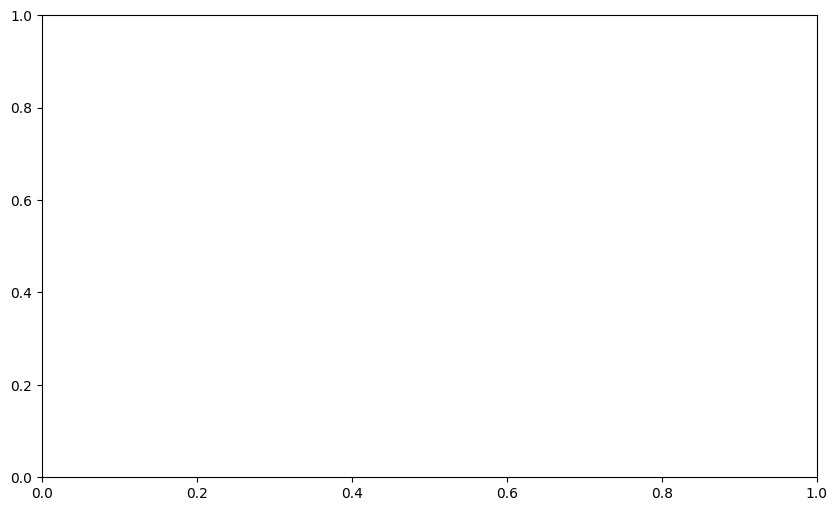

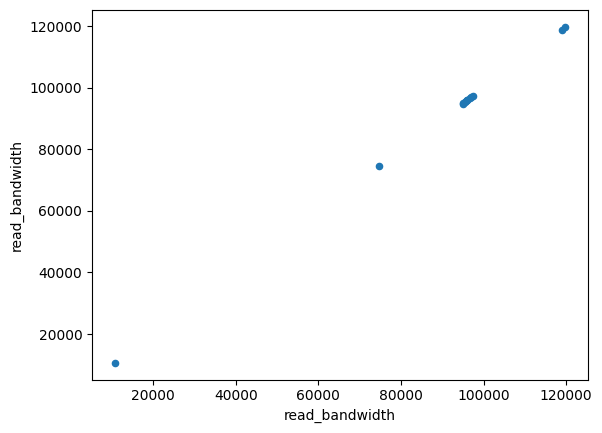

interactive(children=(Dropdown(description='x', options=('read_bandwidth', 'read_latency', 'read_iops', 'write…

<function __main__.my_plot(x: str, y: str, kind: str)>

In [16]:
import ipywidgets as widgets
import numpy as np
import matplotlib
# fio is my variable with all the good data in it

def trendline(x):
    return 0.5 * x + 100

plt, ax = matplotlib.pyplot.subplots( figsize=(10, 6) )
df = fio.to_DataFrame()



# generate a chart of iops vs latency
def my_plot(x:str, y:str, kind:str):
    trendline = np.poly1d(np.polyfit(df[x], df[y], 1))
    ax.plot(df[x], trendline(df[x]), color='red')
    df.plot(y=y, x=x, kind=kind)
    # add a trendline to the chart
    
     

widgets.interact(my_plot, x=df.columns, y=df.columns, kind=['scatter', 'line'])


In [ ]:
def overall_response_time(throughput: list, latency: list):
    """
    Calculate the overall response time for a given throughput and latency.
    """
    curve = fit_latency_curve(throughput, latency)
    area_under_curve = curve.integ()
    response_time = (1/throughput) * area_under_curve
    return response_time


import numpy as np
import pandas as pd
def fit_latency_curve(throughput: list, latency: list):
    """    Fit a curve to the latency data using a weighted least squares method.    """
    curve = np.polynomial.polynomial.Polynomial.fit(x=throughput, y=latency, deg=2, w=1/throughput)
    return curve

# example_data = np.genfromtxt('output/4k_randrw/80/fio.csv', delimiter=',', names=True)
# ORT = overall_response_time(example_data.total_throughput, example_data.avg_latency)
# df = pd.DataFrame(example_data[['total_throughput', 'avg_latency']])

example_data = pd.read_csv('output/8k_randrw/10/fio.csv')
throughput = example_data.total_throughput
latency = example_data.avg_latency
curve = np.polynomial.polynomial.Polynomial.fit(x=throughput, y=latency, deg=2, w=1/throughput)
area = curve.integ()
print(f'curve: {curve} \n area: {area} ')
# throughput_x_new = np.linspace(throughput.min(), throughput.max(), throughput.count())
# latency_mathed = np.polyval(curve, throughput_x_new)
print(f'curve: {curve} \n area: {area} ') # \n throughput_x_new: {throughput_x_new} \n latency_mathed: {latency_mathed}')

# print(df)
# print(f't_new: {t_new}') # \n l_new: {l_new}')



In [107]:
example_data = pd.read_csv('output/128k_rw/10/fio.csv')
example_data.sort_values(by='io_depth', inplace=True)
throughput = example_data.total_throughput
latency = example_data.avg_latency
latency_curve = np.polynomial.polynomial.Polynomial.fit(x=throughput, y=latency, deg=2, w=1/throughput) # w(x) in the paper 
area_under_latency_curve = latency_curve.integ()                                                        # a(x) in the paper
x=0.72
# response_time = area_under_latency_curve(x)                                                             # r(x) in the paper
response_time = latency_curve(x)                                                             # r(x) in the paper
ATP = x/response_time                                                                                # ATP(x) in the paper

def overall_response_time(throughput: list, latency: list, x_val: int):
    """
    Calculate the overall response time for a given throughput and latency.
    """
    latency_curve = np.polynomial.polynomial.Polynomial.fit(x=throughput, y=latency, deg=2, w=1/throughput)     # w(x) in the paper 
    area_under_latency_curve = latency_curve.integ()                                                            # a(x) in the paper 
    response_time = area_under_latency_curve(x_val) / x_val                                                     # r(x) in the paper
    return response_time

def accelerated_throughput_power(x_val: int, riot: int):
    return (x_val**(1+riot))

ORT = overall_response_time(throughput, latency, throughput.max())
# ATP = [overall_response_time(throughput, latency, x) for x in throughput]
riot = 1 # alpha in the paper

print(f'curve: {curve} \n area: {area} \n ORT: {ORT}')
print(ATP)



curve: 1765.1663874029543 + 2517.9624362194554·x¹ + 1761.7086751494098·x² 
 area: 0.0 + 661594070.413758·x¹ + 471873084.94422555·x² + 220099366.94790402·x³ 
 ORT: 1549.6747643898996
0.00046952744872882723


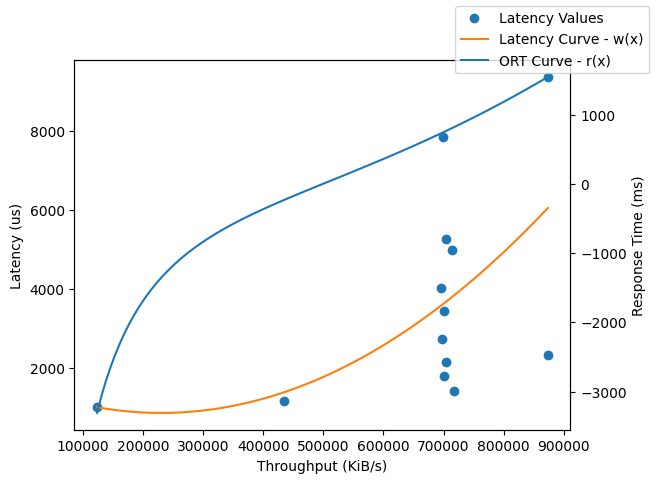

[-3309.24614963895, -3061.011091111846, -2840.851786103581, -2644.3423471267743, -2467.92660516102, -2308.714480922923, -2164.3330081300587, -2032.815628718257, -1912.5187602902533, -1802.058106634129, -1700.259467566787, -1606.120337868931, -1518.7796318545911, -1437.4935959671986, -1361.616482438638, -1290.584921121314, -1223.9051894062306, -1161.1427720333759, -1101.9137442243334, -1045.87761713933, -992.7313640982244, -942.2044063035486, -894.0543829534157, -848.0635662281024, -804.035809291535, -761.7939370874078, -721.1775067502307, -682.0408779547948, -644.2515442908723, -607.6886853774638, -572.2419063834105, -537.8101372523066, -504.3006685127257, -471.62830430211807, -439.7146163103103, -408.48728488678444, -377.87951565782134, -347.82952174695436, -318.28006315021986, -289.1780360386756, -260.47410578664005, -232.12237838911838, -204.08010566345502, -176.3074202509267, -148.76709696209025, -121.42433746034759, -94.24657566379274, -67.20330157622418, -40.265901542765064, -13.

In [103]:
import matplotlib.pyplot as plt

throughput_x_new = np.linspace(throughput.min(), throughput.max(), throughput.count())
latency_mathed = latency_curve(throughput_x_new)


# Find the value of latency_mathed at 73% of the way along the line
point_idx = int(0.73 * len(latency_mathed))
x_val = throughput_x_new[point_idx]
y_val = latency_mathed[point_idx]

throughput_vals = np.linspace(throughput.min(), throughput.max(), 100)
response_time_vals = [overall_response_time(throughput, latency, x) for x in throughput_vals]

# Plot the throughput/latency curve and the response time curve
fig, ax1 = plt.subplots()

ax1.plot(throughput, latency, 'o', label='Latency Values')
ax1.plot(throughput_vals, latency_curve(throughput_vals), '-', label='Latency Curve - w(x)')
ax1.set_xlabel('Throughput (KiB/s)')
ax1.set_ylabel('Latency (us)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(throughput_vals, response_time_vals, label='ORT Curve - r(x)')
ax2.set_ylabel('Response Time (ms)')
ax2.tick_params(axis='y')

fig.legend(loc='upper right')
plt.show()
print(response_time_vals)


